In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv("../../data/round3.csv", delimiter= ";")
df.head(20)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,PICNIC_BASKET2,30094.0,16.0,30093.0,30.0,NaN,NaN,30099,2,30100.0,44.0,NaN,NaN,30096.5,0.000
1,2,0,VOLCANIC_ROCK_VOUCHER_9750,469.0,16.0,NaN,NaN,NaN,NaN,470,16,NaN,NaN,NaN,NaN,469.5,0.000
2,2,0,RAINFOREST_RESIN,9992.0,33.0,NaN,NaN,NaN,NaN,10008,33,NaN,NaN,NaN,NaN,10000.0,0.000
3,2,0,VOLCANIC_ROCK_VOUCHER_9500,718.0,16.0,NaN,NaN,NaN,NaN,719,16,NaN,NaN,NaN,NaN,718.5,0.000
4,2,0,VOLCANIC_ROCK,10218.0,148.0,10217.0,61.0,NaN,NaN,10219,148,10220.0,61.0,NaN,NaN,10218.5,0.000
5,2,0,SQUID_INK,1799.0,28.0,NaN,NaN,NaN,NaN,1802,27,NaN,NaN,NaN,NaN,1800.5,0.000
6,2,0,VOLCANIC_ROCK_VOUCHER_10250,63.0,16.0,NaN,NaN,NaN,NaN,64,16,NaN,NaN,NaN,NaN,63.5,0.000
7,2,0,KELP,2044.0,28.0,NaN,NaN,NaN,NaN,2047,27,NaN,NaN,NaN,NaN,2045.5,0.000
8,2,0,DJEMBES,13419.0,72.0,NaN,NaN,NaN,NaN,13420,72,NaN,NaN,NaN,NaN,13419.5,0.000
9,2,0,CROISSANTS,4265.0,61.0,4264.0,56.0,NaN,NaN,4266,117,NaN,NaN,NaN,NaN,4265.5,0.000


In [3]:
products = df["product"].unique()

basket1_df = df[df["product"] == "PICNIC_BASKET1"].copy()
basket2_df = df[df["product"] == "PICNIC_BASKET2"].copy()
croissant_df = df[df["product"] == "CROISSANTS"].copy()
jam_df = df[df["product"] == "JAMS"].copy()
djembe_df = df[df["product"] == "DJEMBES"].copy()
volcanic_df = df[df["product"] == "VOLCANIC_ROCK"].copy()
vol_df_9500 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_9500"].copy()
vol_df_9750 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_9750"].copy()
vol_df_10000 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_10000"].copy()
vol_df_10250 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_10250"].copy()
vol_df_10500 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_10500"].copy()

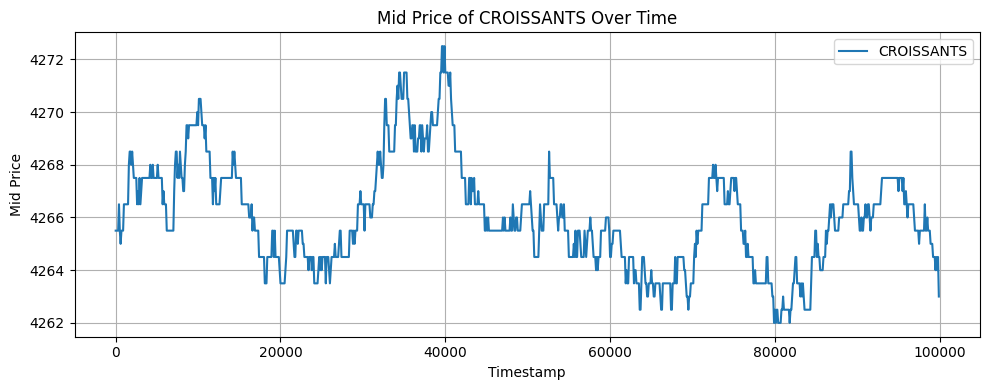

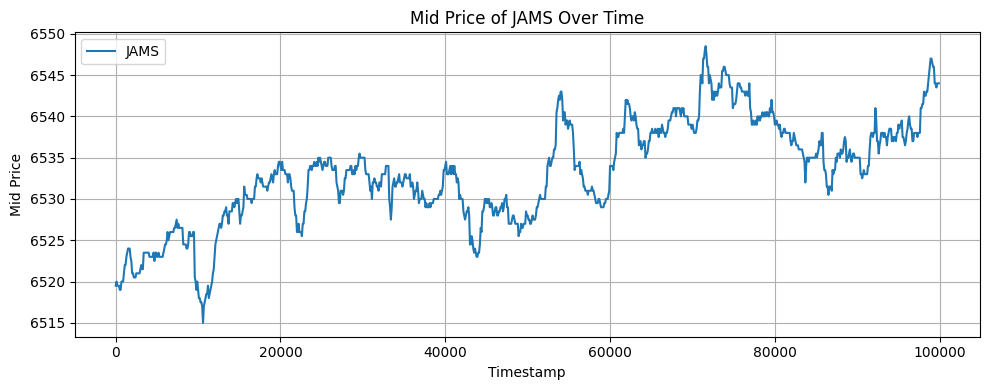

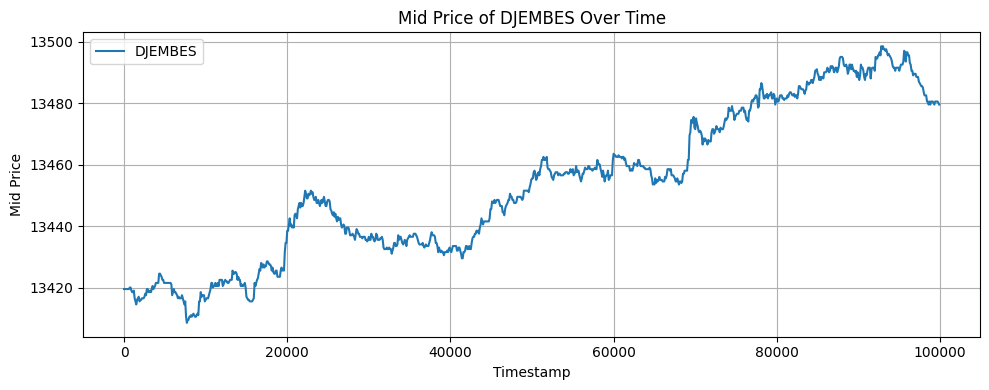

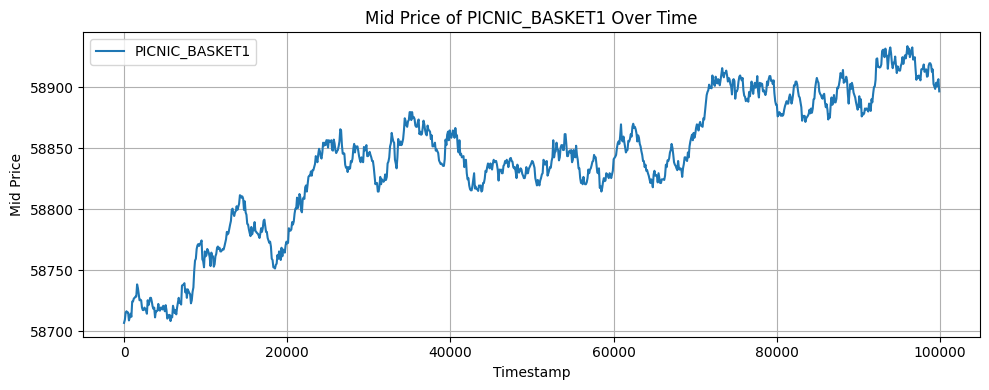

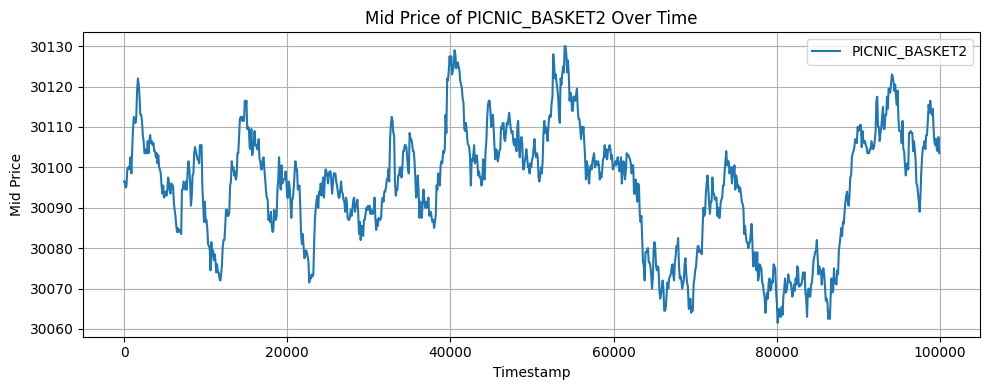

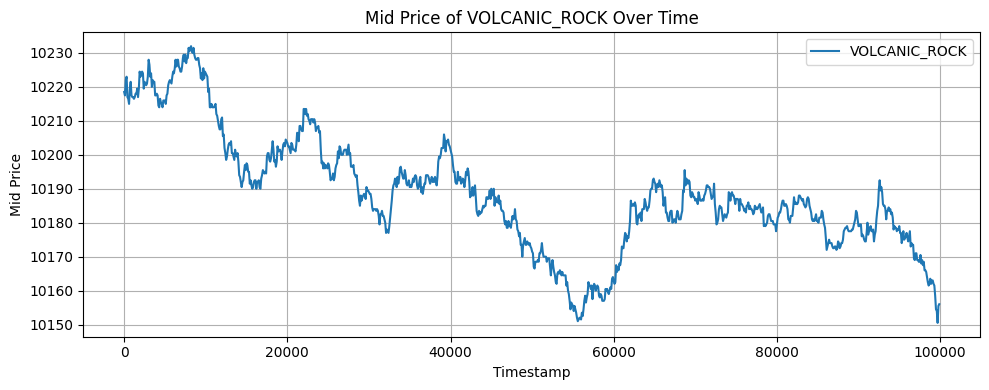

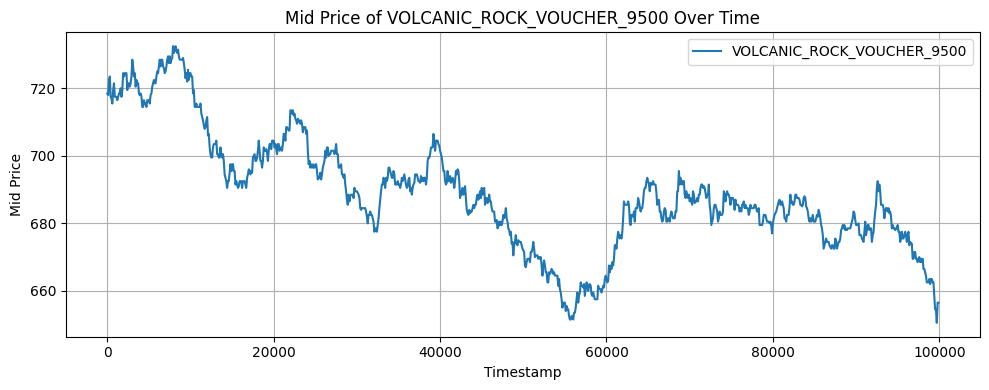

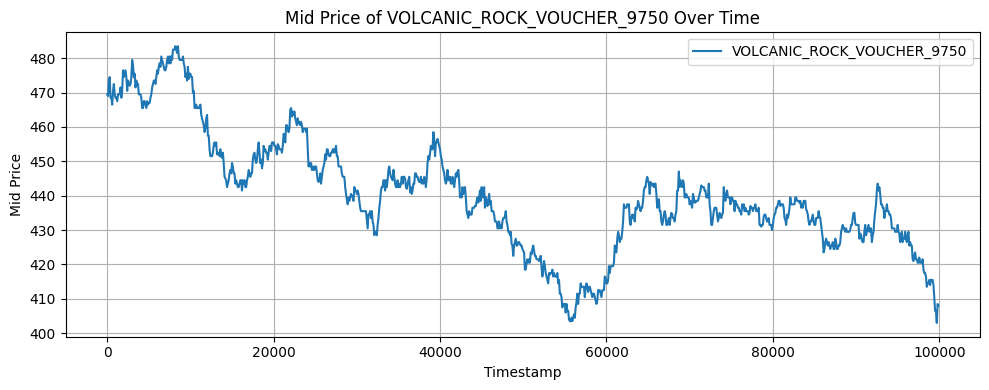

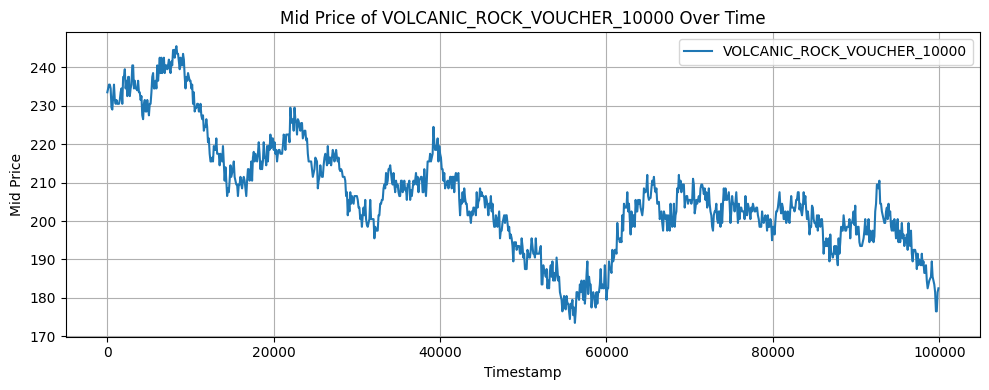

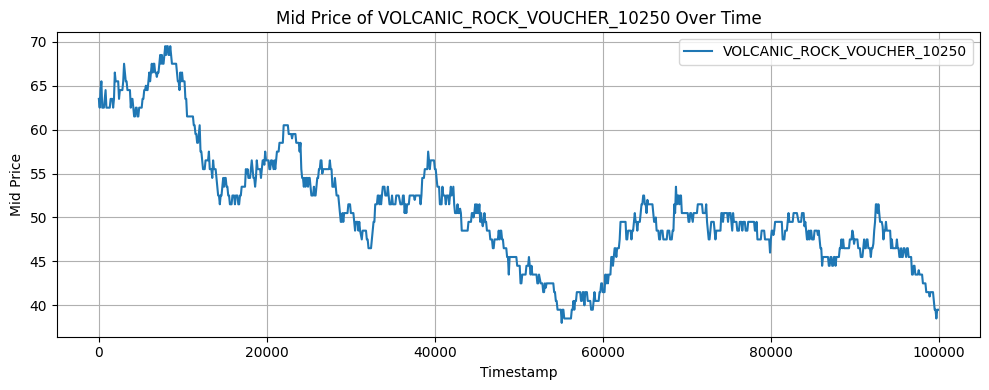

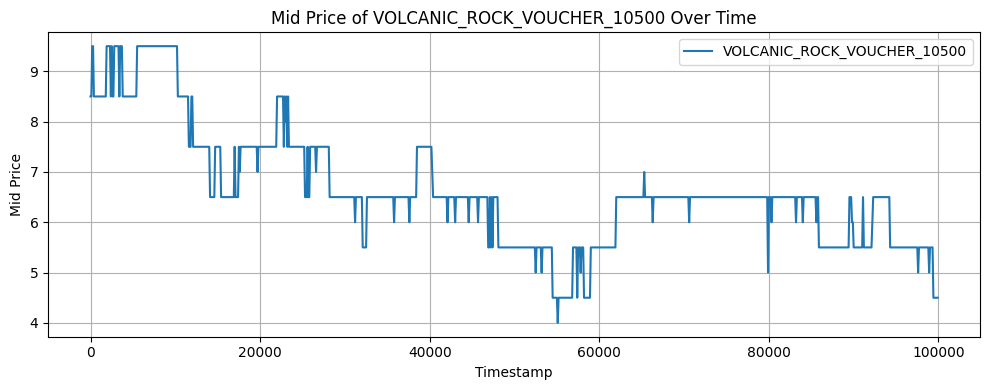

In [4]:
product_names = ["CROISSANTS", "JAMS", "DJEMBES", "PICNIC_BASKET1", "PICNIC_BASKET2", 
                 "VOLCANIC_ROCK", "VOLCANIC_ROCK_VOUCHER_9500", "VOLCANIC_ROCK_VOUCHER_9750", "VOLCANIC_ROCK_VOUCHER_10000",
                 "VOLCANIC_ROCK_VOUCHER_10250", "VOLCANIC_ROCK_VOUCHER_10500"]

# Plot mid-price per product on separate graphs
for product in product_names:
    product_df = df[df["product"] == product]
    plt.figure(figsize=(10, 4))
    plt.plot(product_df["timestamp"], product_df["mid_price"], label=product)
    plt.title(f"Mid Price of {product} Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Mid Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


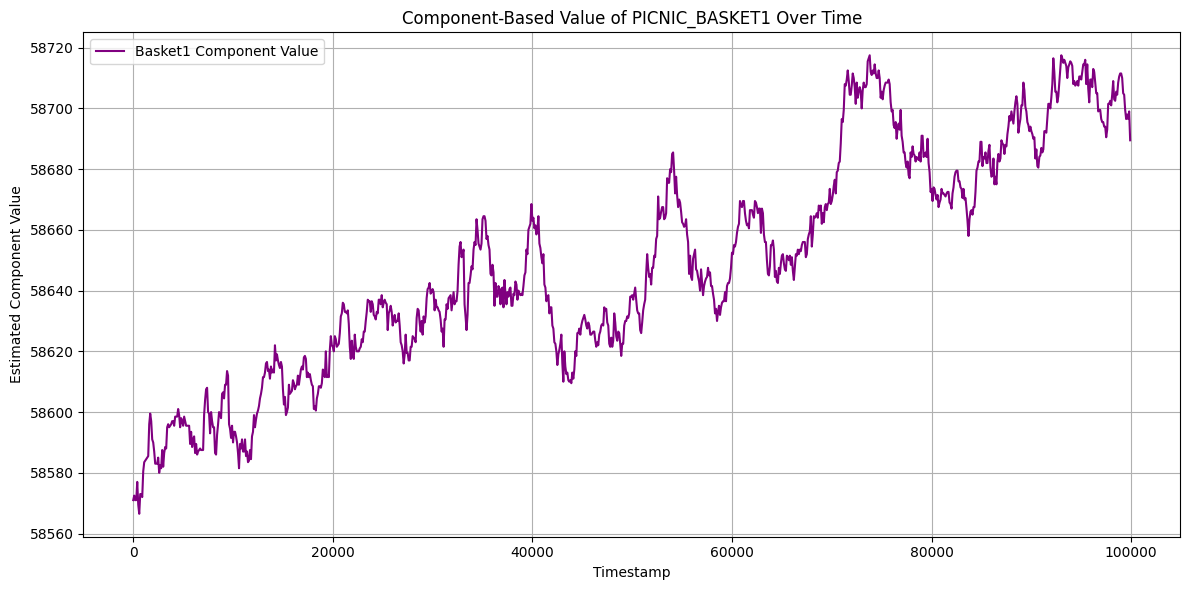

In [5]:
croissant = df[df["product"] == "CROISSANTS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "croissant"})
jam = df[df["product"] == "JAMS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "jam"})
djembe = df[df["product"] == "DJEMBES"][["timestamp", "mid_price"]].rename(columns={"mid_price": "djembe"})

merged = croissant.merge(jam, on="timestamp", how="outer")
merged = merged.merge(djembe, on="timestamp", how="outer")
merged = merged.sort_values("timestamp")
merged.interpolate(method="linear", inplace=True)
merged.dropna(inplace=True)

merged["basket1_component_value"] = 6 * merged["croissant"] + 3 * merged["jam"] + merged["djembe"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged["timestamp"], merged["basket1_component_value"], label="Basket1 Component Value", color="purple")
plt.title("Component-Based Value of PICNIC_BASKET1 Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Estimated Component Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


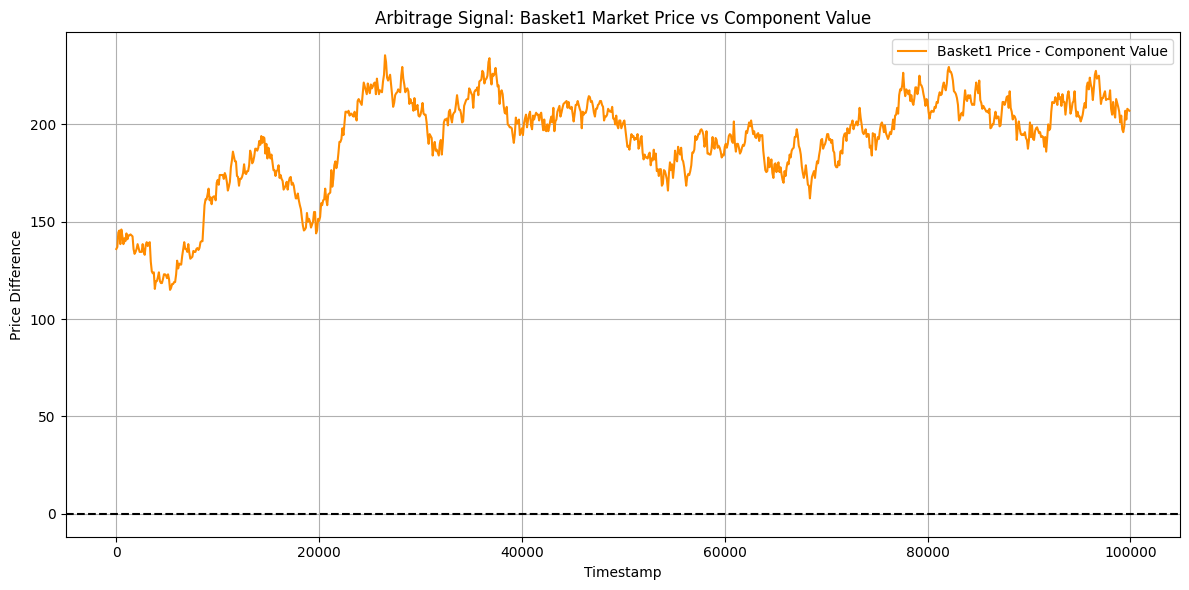

In [6]:
basket1 = df[df["product"] == "PICNIC_BASKET1"][["timestamp", "mid_price"]].rename(columns={"mid_price": "basket1_price"})

comparison = merged.merge(basket1, on="timestamp", how="inner")

comparison["basket1_diff"] = comparison["basket1_price"] - comparison["basket1_component_value"]

plt.figure(figsize=(12, 6))
plt.plot(comparison["timestamp"], comparison["basket1_diff"], label="Basket1 Price - Component Value", color="darkorange")
plt.axhline(0, linestyle="--", color="black")
plt.title("Arbitrage Signal: Basket1 Market Price vs Component Value")
plt.xlabel("Timestamp")
plt.ylabel("Price Difference")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

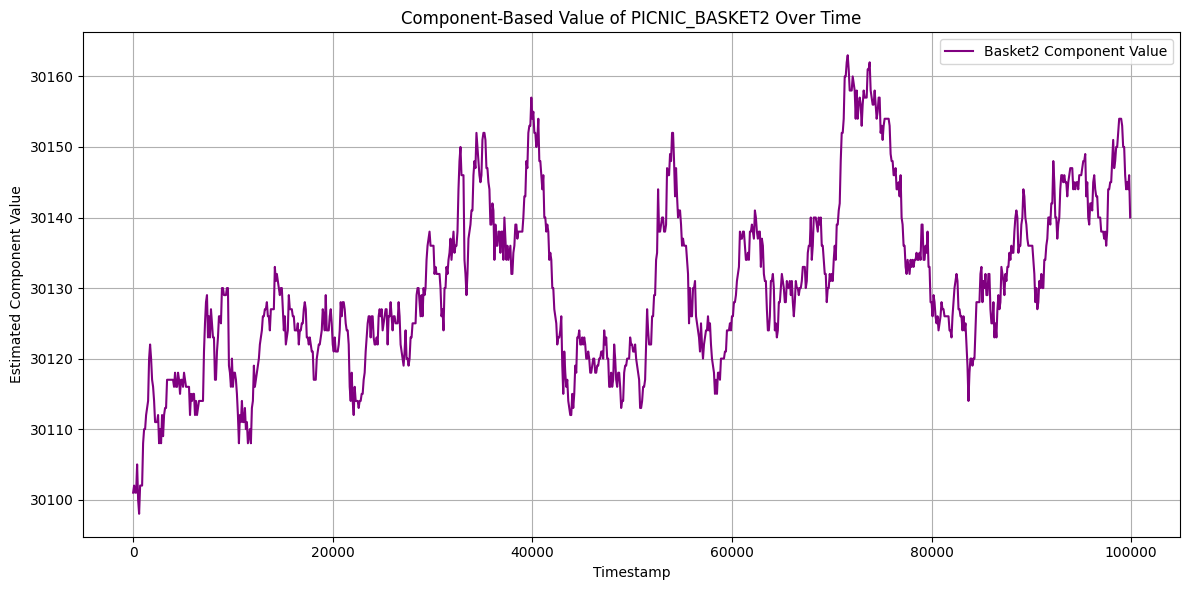

In [7]:
croissant = df[df["product"] == "CROISSANTS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "croissant"})
jam = df[df["product"] == "JAMS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "jam"})

merged = croissant.merge(jam, on="timestamp", how="outer")
merged = merged.sort_values("timestamp")
merged.interpolate(method="linear", inplace=True)
merged.dropna(inplace=True)

merged["basket2_component_value"] = 4 * merged["croissant"] + 2 * merged["jam"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged["timestamp"], merged["basket2_component_value"], label="Basket2 Component Value", color="purple")
plt.title("Component-Based Value of PICNIC_BASKET2 Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Estimated Component Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



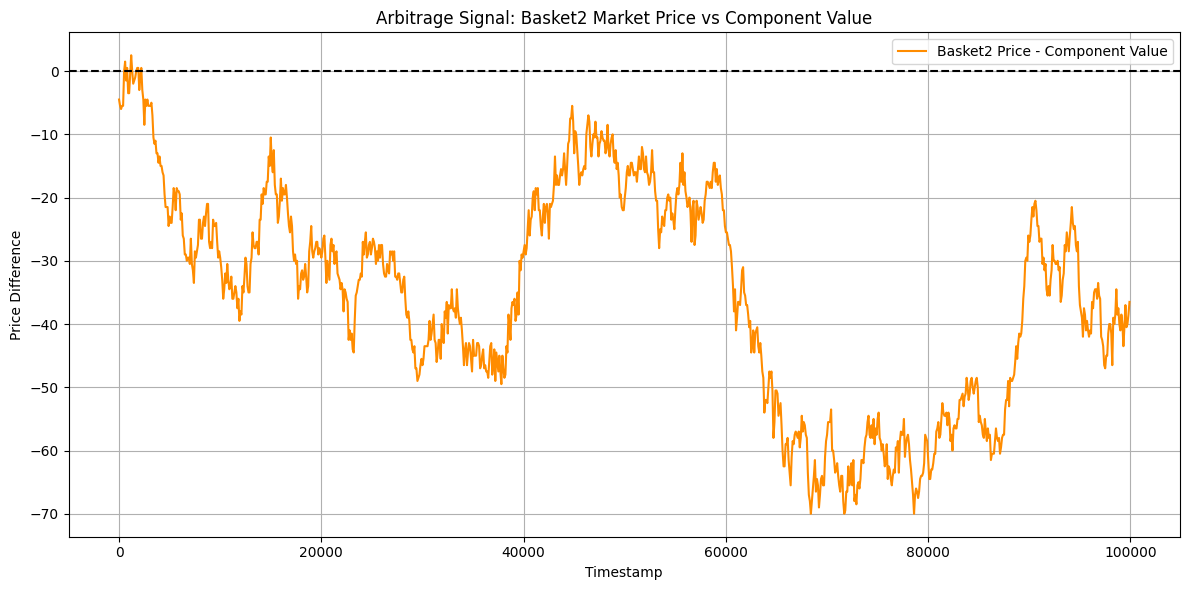

In [8]:
basket2 = df[df["product"] == "PICNIC_BASKET2"][["timestamp", "mid_price"]].rename(columns={"mid_price": "basket2_price"})

comparison = merged.merge(basket2, on="timestamp", how="inner")

comparison["basket2_diff"] = comparison["basket2_price"] - comparison["basket2_component_value"]


# Plot the difference
plt.figure(figsize=(12, 6))
plt.plot(comparison["timestamp"], comparison["basket2_diff"], label="Basket2 Price - Component Value", color="darkorange")



plt.axhline(0, linestyle="--", color="black")
plt.title("Arbitrage Signal: Basket2 Market Price vs Component Value")
plt.xlabel("Timestamp")
plt.ylabel("Price Difference")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [9]:
def compute_mismatch(voucher_df, strike):
    merged = voucher_df.merge(
        volcanic_df[["timestamp", "mid_price"]],
        on="timestamp",
        suffixes=("_voucher", "_rock")
    )
    merged["theoretical"] = merged["mid_price_rock"] - strike
    merged["mismatch"] = merged["mid_price_voucher"] - merged["theoretical"]
    return merged[["timestamp", "mid_price_voucher", "mid_price_rock", "theoretical", "mismatch"]]

# Apply to all
df_9500 = compute_mismatch(vol_df_9500, 9500)
df_9750 = compute_mismatch(vol_df_9750, 9750)
df_10000 = compute_mismatch(vol_df_10000, 10000)
df_10250 = compute_mismatch(vol_df_10250, 10250)
df_10500 = compute_mismatch(vol_df_10500, 10500)

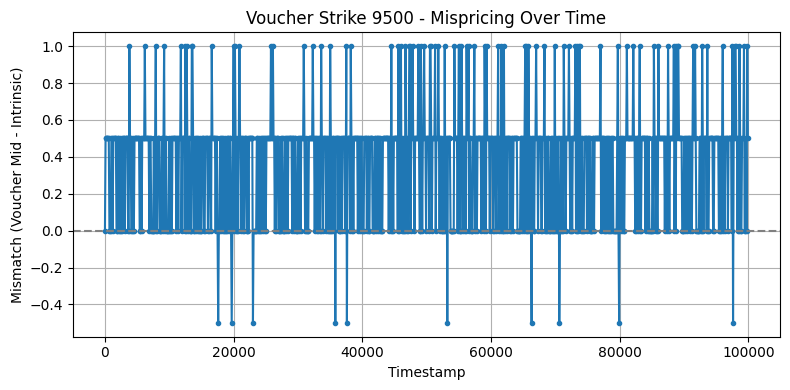

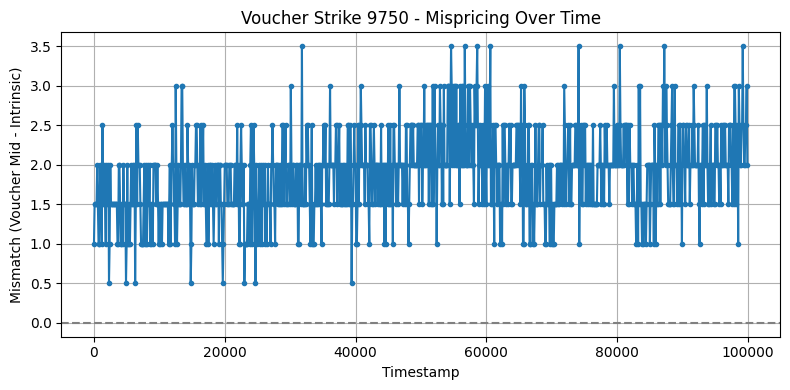

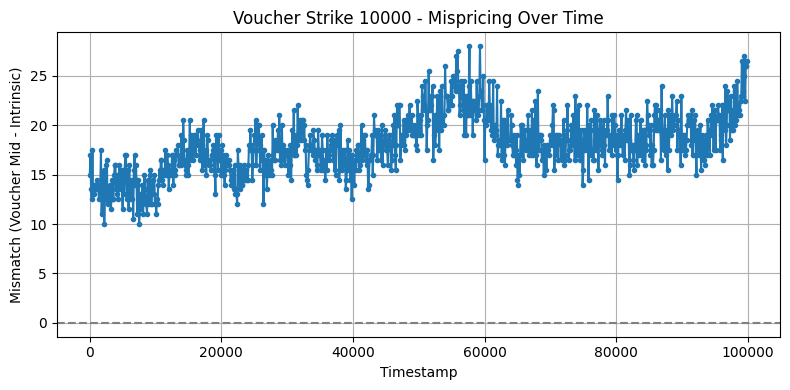

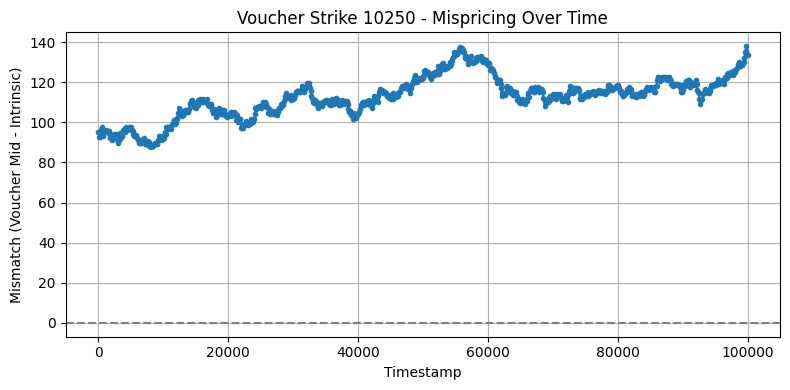

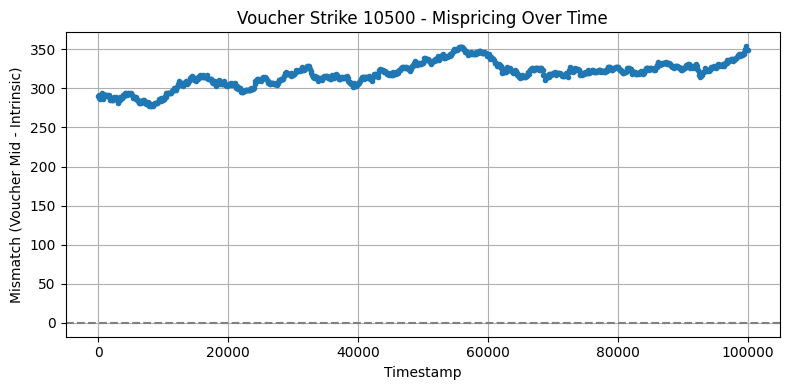

In [10]:
voucher_dfs = [
    ("9500", df_9500),
    ("9750", df_9750),
    ("10000", df_10000),
    ("10250", df_10250),
    ("10500", df_10500)
]
for label, df in voucher_dfs:
    plt.figure(figsize=(8, 4))
    plt.plot(df["timestamp"], df["mismatch"], marker='o', linestyle='-', markersize=3)
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"Voucher Strike {label} - Mispricing Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Mismatch (Voucher Mid - Intrinsic)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [11]:
def compute_smart_trading_signal(voucher_df, rock_df, strike, window=1000):
    merged = voucher_df.merge(
        rock_df[["timestamp", "mid_price"]],
        on="timestamp",
        suffixes=("_voucher", "_rock")
    )

    merged["intrinsic"] = merged["mid_price_rock"] - strike
    merged["premium"] = merged["mid_price_voucher"] - merged["intrinsic"]

    # Rolling stats for smart signals
    merged["mean_premium"] = merged["premium"].rolling(window).mean()
    merged["std_premium"] = merged["premium"].rolling(window).std()

    # Signal:
    # - buy if premium is more than 1 std below mean
    # - sell if more than 1 std above mean
    merged["signal"] = 0
    merged.loc[merged["premium"] < merged["mean_premium"] - merged["std_premium"], "signal"] = 1
    merged.loc[merged["premium"] > merged["mean_premium"] + merged["std_premium"], "signal"] = -1

    return merged[["timestamp", "mid_price_voucher", "mid_price_rock", "intrinsic", "premium", "mean_premium", "std_premium", "signal"]]


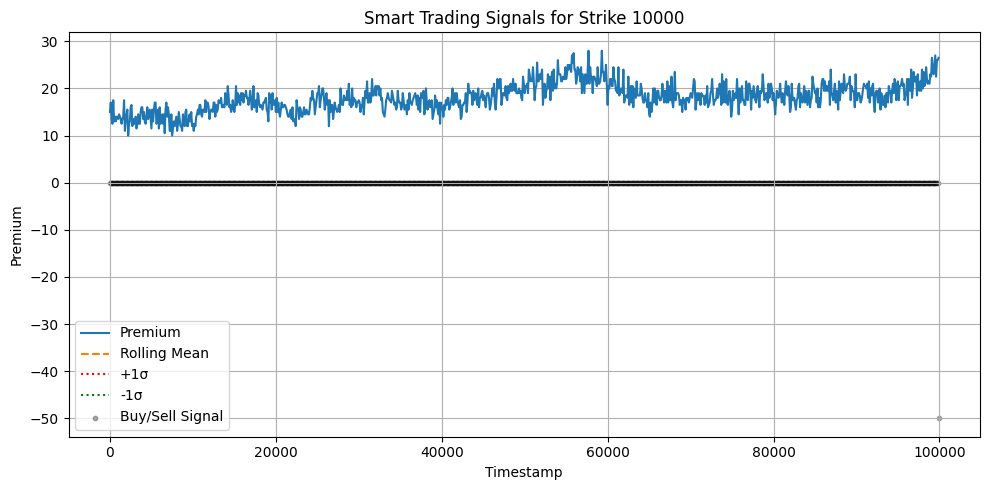

In [12]:
df = compute_smart_trading_signal(vol_df_10000, volcanic_df, 10000)

plt.figure(figsize=(10, 5))
plt.plot(df["timestamp"], df["premium"], label="Premium")
plt.plot(df["timestamp"], df["mean_premium"], label="Rolling Mean", linestyle='--')
plt.plot(df["timestamp"], df["mean_premium"] + df["std_premium"], color='red', linestyle=':', label="+1σ")
plt.plot(df["timestamp"], df["mean_premium"] - df["std_premium"], color='green', linestyle=':', label="-1σ")
plt.scatter(df["timestamp"], df["signal"] * 50, color="black", label="Buy/Sell Signal", alpha=0.3, s=10)
plt.title("Smart Trading Signals for Strike 10000")
plt.xlabel("Timestamp")
plt.ylabel("Premium")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


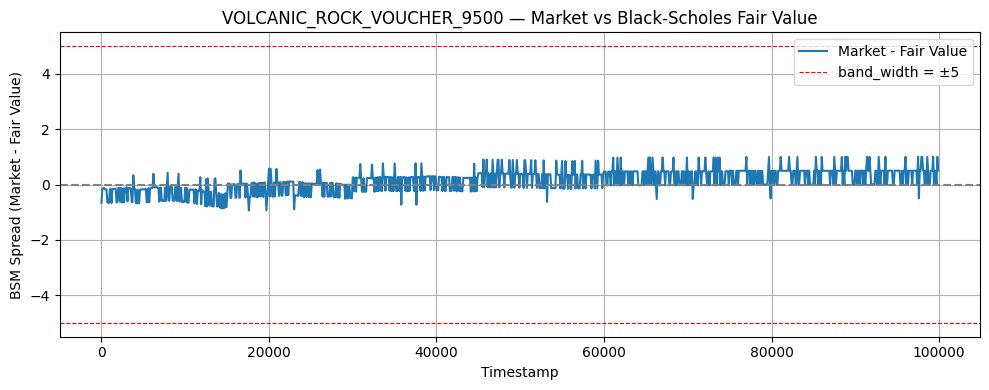

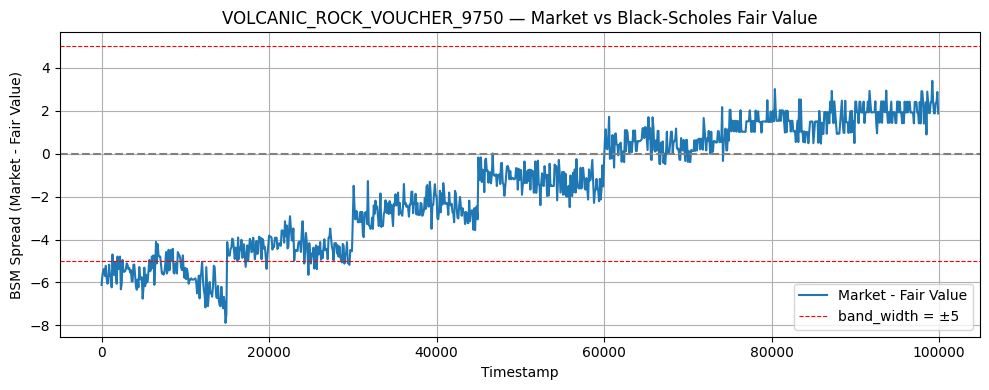

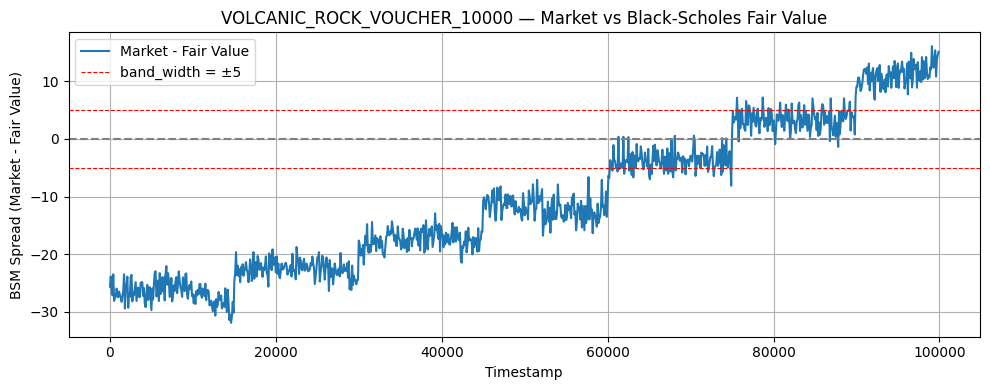

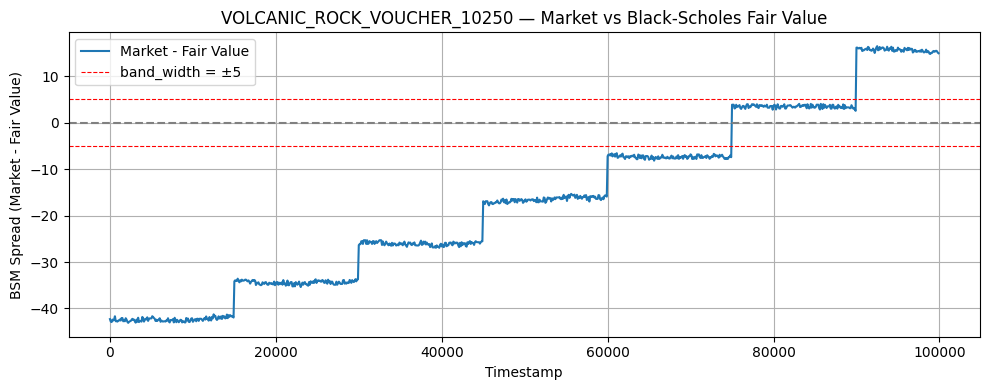

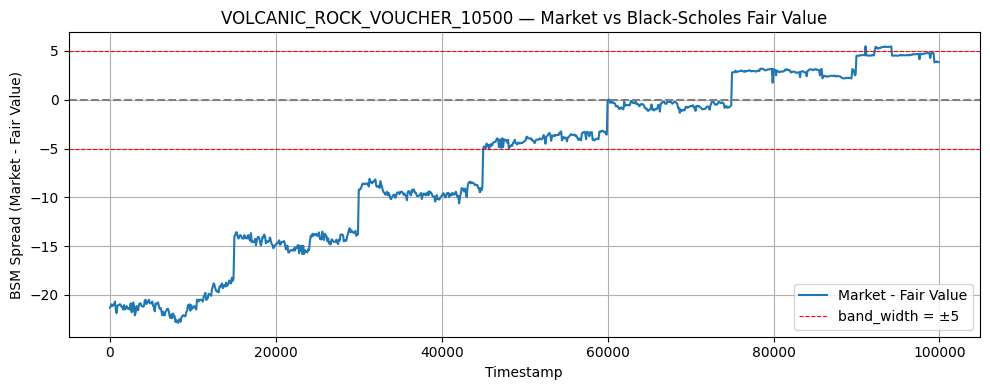

In [19]:




import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import NormalDist

# --------- SETTINGS ---------
CSV_PATH = "../../data/round3.csv"  # replace with your file
FIXED_SIGMA = 0.2
STRIKES = {
    "VOLCANIC_ROCK_VOUCHER_9500": 9500,
    "VOLCANIC_ROCK_VOUCHER_9750": 9750,
    "VOLCANIC_ROCK_VOUCHER_10000": 10000,
    "VOLCANIC_ROCK_VOUCHER_10250": 10250,
    "VOLCANIC_ROCK_VOUCHER_10500": 10500,
}

# --------- BLACK-SCHOLES ---------
def black_scholes_call(S, K, T, r, sigma):
    if T <= 0 or sigma <= 0:
        return max(0, S - K)
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    cdf = NormalDist().cdf
    return S * cdf(d1) - K * math.exp(-r * T) * cdf(d2)

# --------- LOAD + PREPARE DATA ---------
df = pd.read_csv(CSV_PATH, sep=";")
df["timestamp"] = df["timestamp"].astype(int)
df["mid_price"] = df["mid_price"].astype(float)

# Rock mid prices
df_rock = df[df["product"] == "VOLCANIC_ROCK"][["timestamp", "mid_price"]].rename(columns={"mid_price": "rock_mid"})

# Voucher prices
voucher_df = df[df["product"].isin(STRIKES)].copy()
voucher_df["strike"] = voucher_df["product"].map(STRIKES)

# Merge underlying
voucher_df = voucher_df.merge(df_rock, on="timestamp", how="left")

# Estimate T based on timestamp / round
voucher_df["round"] = voucher_df["timestamp"] // 15000
voucher_df["T"] = (8 - voucher_df["round"]).clip(lower=1) / 365
voucher_df["r"] = 0.0
voucher_df["sigma"] = FIXED_SIGMA

# Compute fair value
voucher_df["fair_value"] = voucher_df.apply(
    lambda row: black_scholes_call(row["rock_mid"], row["strike"], row["T"], row["r"], row["sigma"]), axis=1
)

# Market - fair value
voucher_df["bsm_spread"] = voucher_df["mid_price"] - voucher_df["fair_value"]

# --------- PLOT ---------
for product in STRIKES:
    df_p = voucher_df[voucher_df["product"] == product]
    plt.figure(figsize=(10, 4))
    plt.plot(df_p["timestamp"], df_p["bsm_spread"], label="Market - Fair Value")
    plt.axhline(0, color="gray", linestyle="--")
    plt.axhline(5, color="red", linestyle="--", linewidth=0.8, label="band_width = ±5")
    plt.axhline(-5, color="red", linestyle="--", linewidth=0.8)
    plt.title(f"{product} — Market vs Black-Scholes Fair Value")
    plt.xlabel("Timestamp")
    plt.ylabel("BSM Spread (Market - Fair Value)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv("../../data/round3.csv", delimiter=";")

# Filter to VOUCHER and VOLCANIC_ROCK
df = df[df['product'].str.contains("VOUCHER") | (df['product'] == "VOLCANIC_ROCK")].copy()
df['mid_price'] = df['mid_price'].astype(float)

# Extract strike from product names
df['strike'] = df['product'].str.extract(r'(\d+)$').astype(float)

# Map rock price per timestamp
rock_prices = df[df['product'] == "VOLCANIC_ROCK"].groupby('timestamp')['mid_price'].mean()
df['rock_price'] = df['timestamp'].map(rock_prices)
df.dropna(subset=['rock_price', 'strike'], inplace=True)

# Compute time to expiry (T) and moneyness
df['T'] = (8 - 3 - df['timestamp'] / 1_000_000) / 252
df = df[df['T'] > 0]
df['moneyness'] = np.log(df['strike'] / df['rock_price']) / np.sqrt(df['T'])

# Invert Black-Scholes to compute implied vol
def inverse_bs_call(S, K, T, r, market_price):
    if market_price < max(S - K, 0):
        return 0.0001
    low, high = 0.0001, 2.0
    for _ in range(100):
        mid = (low + high) / 2
        d1 = (math.log(S / K) + (r + 0.5 * mid**2) * T) / (mid * math.sqrt(T))
        d2 = d1 - mid * math.sqrt(T)
        price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
        if price > market_price:
            high = mid
        else:
            low = mid
    return mid

df['implied_vol'] = df.apply(lambda row: inverse_bs_call(row['rock_price'], row['strike'], row['T'], 0.0, row['mid_price']), axis=1)

# Fit volatility smile: v(m) = a * m² + b * m
X = df['moneyness'].values.reshape(-1, 1)
X_quad = np.hstack([X**2, X])
reg = LinearRegression().fit(X_quad, df['implied_vol'])
df['smile_vol'] = reg.predict(X_quad)

# Compute delta IV
df['delta_iv'] = df['implied_vol'] - df['smile_vol']

# Compute 95th percentile threshold per product
thresholds = df.groupby("product")['delta_iv'].quantile(0.95).to_dict()

# Show result
print("95th percentile delta_iv thresholds per voucher:")
for product, threshold in thresholds.items():
    print(f"{product}: {threshold:.5f}")

95th percentile delta_iv thresholds per voucher:
VOLCANIC_ROCK_VOUCHER_10000: 0.00480
VOLCANIC_ROCK_VOUCHER_10250: -0.00410
VOLCANIC_ROCK_VOUCHER_10500: 0.00631
VOLCANIC_ROCK_VOUCHER_9500: 0.05741
VOLCANIC_ROCK_VOUCHER_9750: 0.01989


Checking for missing data...
mid_price    0
timestamp    0
dtype: int64


/var/folders/sh/xd03dgt578z9cbyfpq7w5z680000gn/T/ipykernel_6434/1905193664.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['moneyness'] = df_filtered.apply(calculate_moneyness, axis=1)


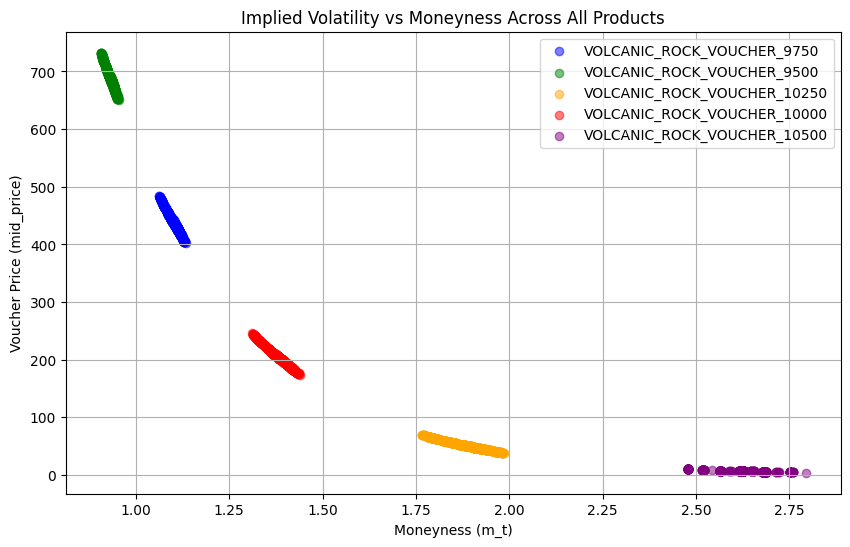

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data from the CSV file
file_path = "../../data/round3.csv"
df = pd.read_csv(file_path, delimiter=";")

# Step 2: Filter for the products you're interested in
products = [
    "VOLCANIC_ROCK_VOUCHER_9750",
    "VOLCANIC_ROCK_VOUCHER_9500",
    "VOLCANIC_ROCK_VOUCHER_10250",
    "VOLCANIC_ROCK_VOUCHER_10000",
    "VOLCANIC_ROCK_VOUCHER_10500"
]
df_filtered = df[df['product'].isin(products)]

# Step 3: Check for any rows with missing mid_price or timestamp
print("Checking for missing data...")
print(df_filtered[['mid_price', 'timestamp']].isna().sum())

# Step 4: Plot all the data (implied volatility vs moneyness)
# For this, we will need to calculate moneyness, so we'll assume you have mid_price and timestamp data.

# Calculate moneyness (m_t) using the formula: m_t = log(K / S_t) / sqrt(TTE)
# We'll assume TTE is some constant (you can replace it with actual time to expiry if available).
strike_prices = {
    "VOLCANIC_ROCK_VOUCHER_9750": 9750,
    "VOLCANIC_ROCK_VOUCHER_9500": 9500,
    "VOLCANIC_ROCK_VOUCHER_10250": 10250,
    "VOLCANIC_ROCK_VOUCHER_10000": 10000,
    "VOLCANIC_ROCK_VOUCHER_10500": 10500
}

# Function to calculate moneyness (m_t)
def calculate_moneyness(row):
    strike_price = strike_prices[row['product']]  # Get the strike price for the product
    mid_price = row['mid_price']  # The price of the voucher
    TTE = max(0.01, (8_000_000 - row['timestamp']) / 1_000_000)  # Calculate Time to Expiry (TTE)
    return np.log(strike_price / mid_price) / np.sqrt(TTE)  # Moneyness formula

# Calculate moneyness for all rows in the filtered data
df_filtered['moneyness'] = df_filtered.apply(calculate_moneyness, axis=1)

# Step 5: Plot Implied Volatility vs Moneyness
plt.figure(figsize=(10, 6))

# Use colors to distinguish different products
colors = {
    "VOLCANIC_ROCK_VOUCHER_9750": 'blue',
    "VOLCANIC_ROCK_VOUCHER_9500": 'green',
    "VOLCANIC_ROCK_VOUCHER_10250": 'orange',
    "VOLCANIC_ROCK_VOUCHER_10000": 'red',
    "VOLCANIC_ROCK_VOUCHER_10500": 'purple'
}

# Plot the data for each product with different colors
for product, color in colors.items():
    product_data = df_filtered[df_filtered['product'] == product]
    plt.scatter(product_data['moneyness'], product_data['mid_price'], label=product, color=color, alpha=0.5)

# Add titles and labels
plt.title('Implied Volatility vs Moneyness Across All Products')
plt.xlabel('Moneyness (m_t)')
plt.ylabel('Voucher Price (mid_price)')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Checking for missing data...
mid_price    0
timestamp    0
dtype: int64


/var/folders/sh/xd03dgt578z9cbyfpq7w5z680000gn/T/ipykernel_6434/456616018.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['moneyness'] = df_filtered.apply(calculate_moneyness, axis=1)
/var/folders/sh/xd03dgt578z9cbyfpq7w5z680000gn/T/ipykernel_6434/456616018.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['implied_vol'] = df_filtered.apply(lambda row: implied_volatility(


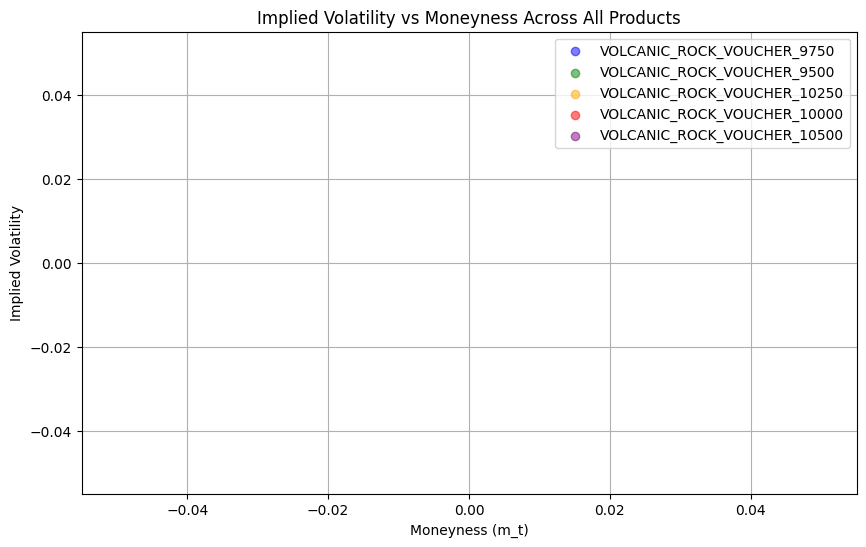

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
from math import log, sqrt, exp

# Load the data
file_path = "../../data/round3.csv"
df = pd.read_csv(file_path, delimiter=";")

# Step 1: Filter for the products you're interested in
products = [
    "VOLCANIC_ROCK_VOUCHER_9750",
    "VOLCANIC_ROCK_VOUCHER_9500",
    "VOLCANIC_ROCK_VOUCHER_10250",
    "VOLCANIC_ROCK_VOUCHER_10000",
    "VOLCANIC_ROCK_VOUCHER_10500"
]
df_filtered = df[df['product'].isin(products)]

# Step 2: Check for any rows with missing mid_price or timestamp
print("Checking for missing data...")
print(df_filtered[['mid_price', 'timestamp']].isna().sum())

# Step 3: Define the strike prices for each voucher
strike_prices = {
    "VOLCANIC_ROCK_VOUCHER_9750": 9750,
    "VOLCANIC_ROCK_VOUCHER_9500": 9500,
    "VOLCANIC_ROCK_VOUCHER_10250": 10250,
    "VOLCANIC_ROCK_VOUCHER_10000": 10000,
    "VOLCANIC_ROCK_VOUCHER_10500": 10500
}

# Step 4: Define the Black-Scholes formula for implied volatility calculation
def black_scholes_call(S, K, T, r, sigma):
    """ Calculate the Black-Scholes call price for a given implied volatility (sigma). """
    if T <= 0 or sigma <= 0:
        return max(0, S - K)  # If T <= 0 or sigma <= 0, it behaves like a simple call option
    d1 = (log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return S * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)

def implied_volatility(S, K, T, r, option_price):
    """ Calculate implied volatility by solving Black-Scholes equation. """
    def objective(sigma):
        return black_scholes_call(S, K, T, r, sigma) - option_price
    try:
        iv = brentq(objective, 1e-6, 5)  # Use Brent's method to find the implied volatility
        return iv
    except ValueError:
        return np.nan  # Return NaN if the implied volatility can't be solved

# Step 5: Calculate moneyness (m_t) and implied volatility
def calculate_moneyness(row):
    strike_price = strike_prices[row['product']]  # Get the strike price for the product
    mid_price = row['mid_price']  # The price of the voucher
    TTE = max(0.01, (8_000_000 - row['timestamp']) / 1_000_000)  # Calculate Time to Expiry (TTE)
    moneyness = np.log(strike_price / mid_price) / np.sqrt(TTE)  # Moneyness formula
    return moneyness

# Calculate moneyness for all rows
df_filtered['moneyness'] = df_filtered.apply(calculate_moneyness, axis=1)

# Calculate implied volatility using the mid_price as the option price
r = 0.0  # Assuming a constant risk-free rate (can adjust if needed)
df_filtered['implied_vol'] = df_filtered.apply(lambda row: implied_volatility(
    row['mid_price'], strike_prices[row['product']], max(0.01, (8_000_000 - row['timestamp']) / 1_000_000), r, row['mid_price']), axis=1)

# Step 6: Plot Implied Volatility vs Moneyness
plt.figure(figsize=(10, 6))

# Use colors to distinguish different products
colors = {
    "VOLCANIC_ROCK_VOUCHER_9750": 'blue',
    "VOLCANIC_ROCK_VOUCHER_9500": 'green',
    "VOLCANIC_ROCK_VOUCHER_10250": 'orange',
    "VOLCANIC_ROCK_VOUCHER_10000": 'red',
    "VOLCANIC_ROCK_VOUCHER_10500": 'purple'
}

# Plot the data for each product with different colors
for product, color in colors.items():
    product_data = df_filtered[df_filtered['product'] == product]
    plt.scatter(product_data['moneyness'], product_data['implied_vol'], label=product, color=color, alpha=0.5)

# Add titles and labels
plt.title('Implied Volatility vs Moneyness Across All Products')
plt.xlabel('Moneyness (m_t)')
plt.ylabel('Implied Volatility')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Implied Volatility (v_t) calculated from the fitted curve for each product:
                           product  moneyness  implied_volatility_from_curve
1       VOLCANIC_ROCK_VOUCHER_9750   1.072453                      63.701255
3       VOLCANIC_ROCK_VOUCHER_9500   0.912833                     106.155577
6      VOLCANIC_ROCK_VOUCHER_10250   1.797463                    -120.337088
11     VOLCANIC_ROCK_VOUCHER_10000   1.328356                      -2.903821
12     VOLCANIC_ROCK_VOUCHER_10500   2.516969                    -288.727885
...                            ...        ...                            ...
13987   VOLCANIC_ROCK_VOUCHER_9500   0.950693                      96.022618
13990   VOLCANIC_ROCK_VOUCHER_9750   1.129164                      48.785779
13994  VOLCANIC_ROCK_VOUCHER_10500   2.759107                    -342.204250
13997  VOLCANIC_ROCK_VOUCHER_10000   1.424404                     -27.439260
13998  VOLCANIC_ROCK_VOUCHER_10250   1.977696                    -163.850769


/var/folders/sh/xd03dgt578z9cbyfpq7w5z680000gn/T/ipykernel_6434/1597002293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['implied_volatility_from_curve'] = df_filtered['moneyness'].apply(


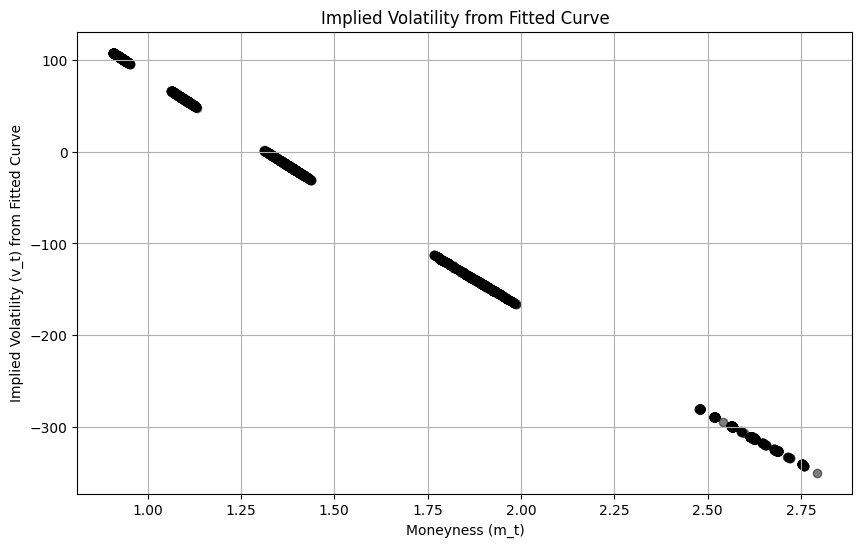

In [33]:
a, b, c = poly.coef  # These are the parameters of the fitted curve: a, b, c

# Step 2: Define the function to calculate implied volatility from the fitted curve
def calculate_implied_volatility_from_curve(m_t, a, b, c):
    return a * m_t**2 + b * m_t + c

# Step 3: Calculate the implied volatility for each product (using the correct DataFrame)
df_filtered['implied_volatility_from_curve'] = df_filtered['moneyness'].apply(
    lambda m: calculate_implied_volatility_from_curve(m, a, b, c)
)

# Step 4: Display the results
print("Implied Volatility (v_t) calculated from the fitted curve for each product:")
print(df_filtered[['product', 'moneyness', 'implied_volatility_from_curve']])

# Step 5: Plot the results if desired
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['moneyness'], df_filtered['implied_volatility_from_curve'], alpha=0.5, c='black')
plt.title('Implied Volatility from Fitted Curve')
plt.xlabel('Moneyness (m_t)')
plt.ylabel('Implied Volatility (v_t) from Fitted Curve')
plt.grid(True)
plt.show()

Base IV and Thresholds for each product:
                           product  threshold_upper  threshold_lower
1       VOLCANIC_ROCK_VOUCHER_9750       398.602461       326.129286
3       VOLCANIC_ROCK_VOUCHER_9500       398.602461       326.129286
6      VOLCANIC_ROCK_VOUCHER_10250       398.602461       326.129286
11     VOLCANIC_ROCK_VOUCHER_10000       398.602461       326.129286
12     VOLCANIC_ROCK_VOUCHER_10500       398.602461       326.129286
...                            ...              ...              ...
13987   VOLCANIC_ROCK_VOUCHER_9500       398.602461       326.129286
13990   VOLCANIC_ROCK_VOUCHER_9750       398.602461       326.129286
13994  VOLCANIC_ROCK_VOUCHER_10500       398.602461       326.129286
13997  VOLCANIC_ROCK_VOUCHER_10000       398.602461       326.129286
13998  VOLCANIC_ROCK_VOUCHER_10250       398.602461       326.129286

[5000 rows x 3 columns]


/var/folders/sh/xd03dgt578z9cbyfpq7w5z680000gn/T/ipykernel_6434/3809806982.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['threshold_upper'] = base_iv * (1 + threshold_percentage)
/var/folders/sh/xd03dgt578z9cbyfpq7w5z680000gn/T/ipykernel_6434/3809806982.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['threshold_lower'] = base_iv * (1 - threshold_percentage)


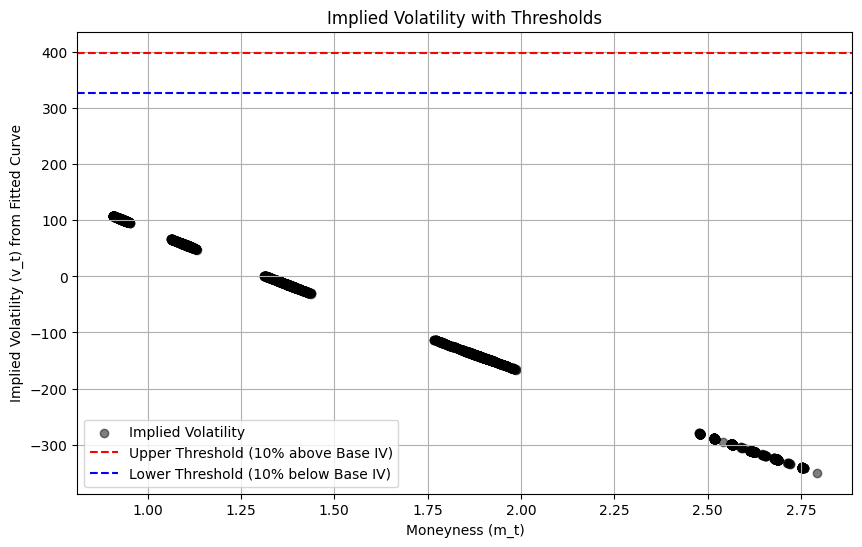

In [34]:
a, b, c = poly.coef  # These are the parameters of the fitted curve: a, b, c

# Step 2: Define the function to calculate implied volatility from the fitted curve
def calculate_implied_volatility_from_curve(m_t, a, b, c):
    return a * m_t**2 + b * m_t + c

# Calculate the base IV (v_t at m_t = 0) from the fitted curve
base_iv = calculate_implied_volatility_from_curve(0, a, b, c)

# Define a threshold multiplier (e.g., ±10% of the base IV)
threshold_percentage = 0.10  # 10% threshold
df_filtered['threshold_upper'] = base_iv * (1 + threshold_percentage)
df_filtered['threshold_lower'] = base_iv * (1 - threshold_percentage)

# Display the thresholds for each product
print("Base IV and Thresholds for each product:")
print(df_filtered[['product', 'threshold_upper', 'threshold_lower']])

# Step 5: Plot the implied volatility and the thresholds
plt.figure(figsize=(10, 6))

# Plot the individual data points for implied volatility
plt.scatter(df_filtered['moneyness'], df_filtered['implied_volatility_from_curve'], alpha=0.5, c='black', label='Implied Volatility')

# Plot the thresholds (upper and lower bounds)
plt.axhline(y=df_filtered['threshold_upper'].mean(), color='red', linestyle='--', label='Upper Threshold (10% above Base IV)')
plt.axhline(y=df_filtered['threshold_lower'].mean(), color='blue', linestyle='--', label='Lower Threshold (10% below Base IV)')

# Add titles and labels
plt.title('Implied Volatility with Thresholds')
plt.xlabel('Moneyness (m_t)')
plt.ylabel('Implied Volatility (v_t) from Fitted Curve')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()

95th percentile delta_iv thresholds per voucher:
VOLCANIC_ROCK_VOUCHER_10000: 0.00480
VOLCANIC_ROCK_VOUCHER_10250: -0.00410
VOLCANIC_ROCK_VOUCHER_10500: 0.00631
VOLCANIC_ROCK_VOUCHER_9500: 0.05741
VOLCANIC_ROCK_VOUCHER_9750: 0.01989


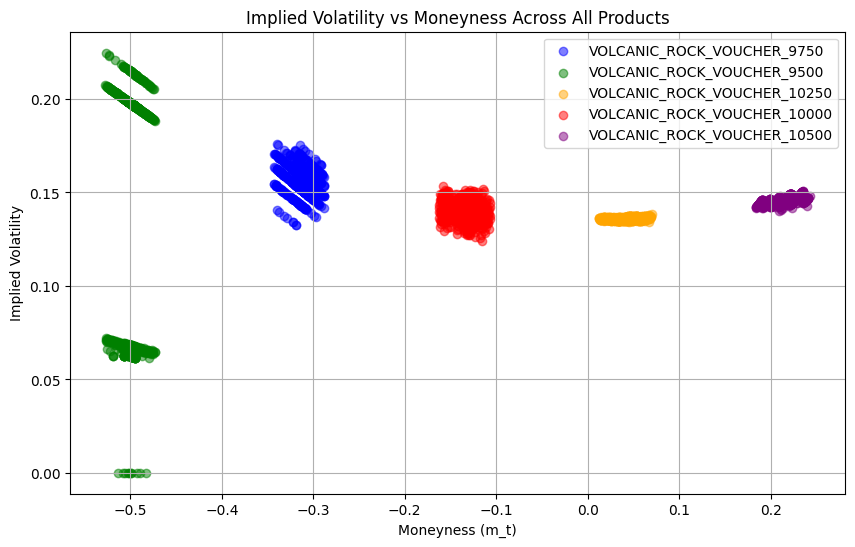

In [54]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("../../data/round3.csv", delimiter=";")

# Step 1: Filter to VOUCHER and VOLCANIC_ROCK
df = df[df['product'].str.contains("VOUCHER") | (df['product'] == "VOLCANIC_ROCK")].copy()
df['mid_price'] = df['mid_price'].astype(float)

# Extract strike from product names
df['strike'] = df['product'].str.extract(r'(\d+)$').astype(float)

# Map rock price per timestamp
rock_prices = df[df['product'] == "VOLCANIC_ROCK"].groupby('timestamp')['mid_price'].mean()
df['rock_price'] = df['timestamp'].map(rock_prices)
df.dropna(subset=['rock_price', 'strike'], inplace=True)

# Compute time to expiry (T) and moneyness
df['T'] = (8 - 3 - df['timestamp'] / 1_000_000) / 252
df = df[df['T'] > 0]
df['moneyness'] = np.log(df['strike'] / df['rock_price']) / np.sqrt(df['T'])

# Invert Black-Scholes to compute implied vol
def inverse_bs_call(S, K, T, r, market_price):
    if market_price < max(S - K, 0):
        return 0.0001
    low, high = 0.0001, 2.0
    for _ in range(100):
        mid = (low + high) / 2
        d1 = (math.log(S / K) + (r + 0.5 * mid**2) * T) / (mid * math.sqrt(T))
        d2 = d1 - mid * math.sqrt(T)
        price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
        if price > market_price:
            high = mid
        else:
            low = mid
    return mid

df['implied_vol'] = df.apply(lambda row: inverse_bs_call(row['rock_price'], row['strike'], row['T'], 0.0, row['mid_price']), axis=1)

# Fit volatility smile: v(m) = a * m² + b * m
X = df['moneyness'].values.reshape(-1, 1)
X_quad = np.hstack([X**2, X])
reg = LinearRegression().fit(X_quad, df['implied_vol'])
df['smile_vol'] = reg.predict(X_quad)

# Compute delta IV
df['delta_iv'] = df['implied_vol'] - df['smile_vol']

# Compute 95th percentile threshold per product
thresholds = df.groupby("product")['delta_iv'].quantile(0.95).to_dict()

# Show 95th percentile thresholds
print("95th percentile delta_iv thresholds per voucher:")
for product, threshold in thresholds.items():
    print(f"{product}: {threshold:.5f}")

# Step 2: Plot Implied Volatility vs Moneyness
plt.figure(figsize=(10, 6))

# Use colors to distinguish different products
colors = {
    "VOLCANIC_ROCK_VOUCHER_9750": 'blue',
    "VOLCANIC_ROCK_VOUCHER_9500": 'green',
    "VOLCANIC_ROCK_VOUCHER_10250": 'orange',
    "VOLCANIC_ROCK_VOUCHER_10000": 'red',
    "VOLCANIC_ROCK_VOUCHER_10500": 'purple'
}

# Plot the data for each product with different colors
for product, color in colors.items():
    product_data = df[df['product'] == product]
    plt.scatter(product_data['moneyness'], product_data['implied_vol'], label=product, color=color, alpha=0.5)

# Add titles and labels
plt.title('Implied Volatility vs Moneyness Across All Products')
plt.xlabel('Moneyness (m_t)')
plt.ylabel('Implied Volatility')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()
